# Main - market crash

This notebook runs an experiment on a market crash using the Bornholdt Ising Model. The goal is to observe how the market reacts to a sudden localized shock and whether the perturbation propagates over time.

In [14]:
from source.krachspinsystem import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list
from datetime import datetime
import numpy as np
from numpy import empty, nan, savetxt
import matplotlib.pyplot as plt
import random
np.random.seed(2025)

In [2]:
MAX_FILE_SIZE = 100_000

config_filename = "multising.conf"
config = read_config_file(config_filename)

In [3]:
#initialization

#parameters
grid_height   = int(config["grid_height"])
grid_width    = int(config["grid_width"])
alpha         = float(config["alpha"])
j             = float(config["j"])
total_updates = int(config["total_updates"])
init_up       = float(config["init_up"])
T             = float(config["T"])
beta          = 1 / T
reduced_alpha              = -2.0 * beta * alpha
reduced_neighbour_coupling = -2.0 * beta * j

magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan


# I. With market crash

In [81]:
#with krach
#SEED = 42
#np.random.seed(SEED)
#random.seed(SEED)

#init system
spin_system = SpinSystem(
    grid_height=32,
    grid_width=32,
    init_up=0.3
)

full_grids_with_krach = []
full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(100):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    magnetisation[ii % MAX_FILE_SIZE] = mag
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

#choc local
spin_system.induce_local_crash(fraction=1, region="bottom_right")
mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
magnetisation[100 % MAX_FILE_SIZE] = mag

# Maintenant on poursuit la simulation pour voir la propagation
for ii in range(101, total_updates):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

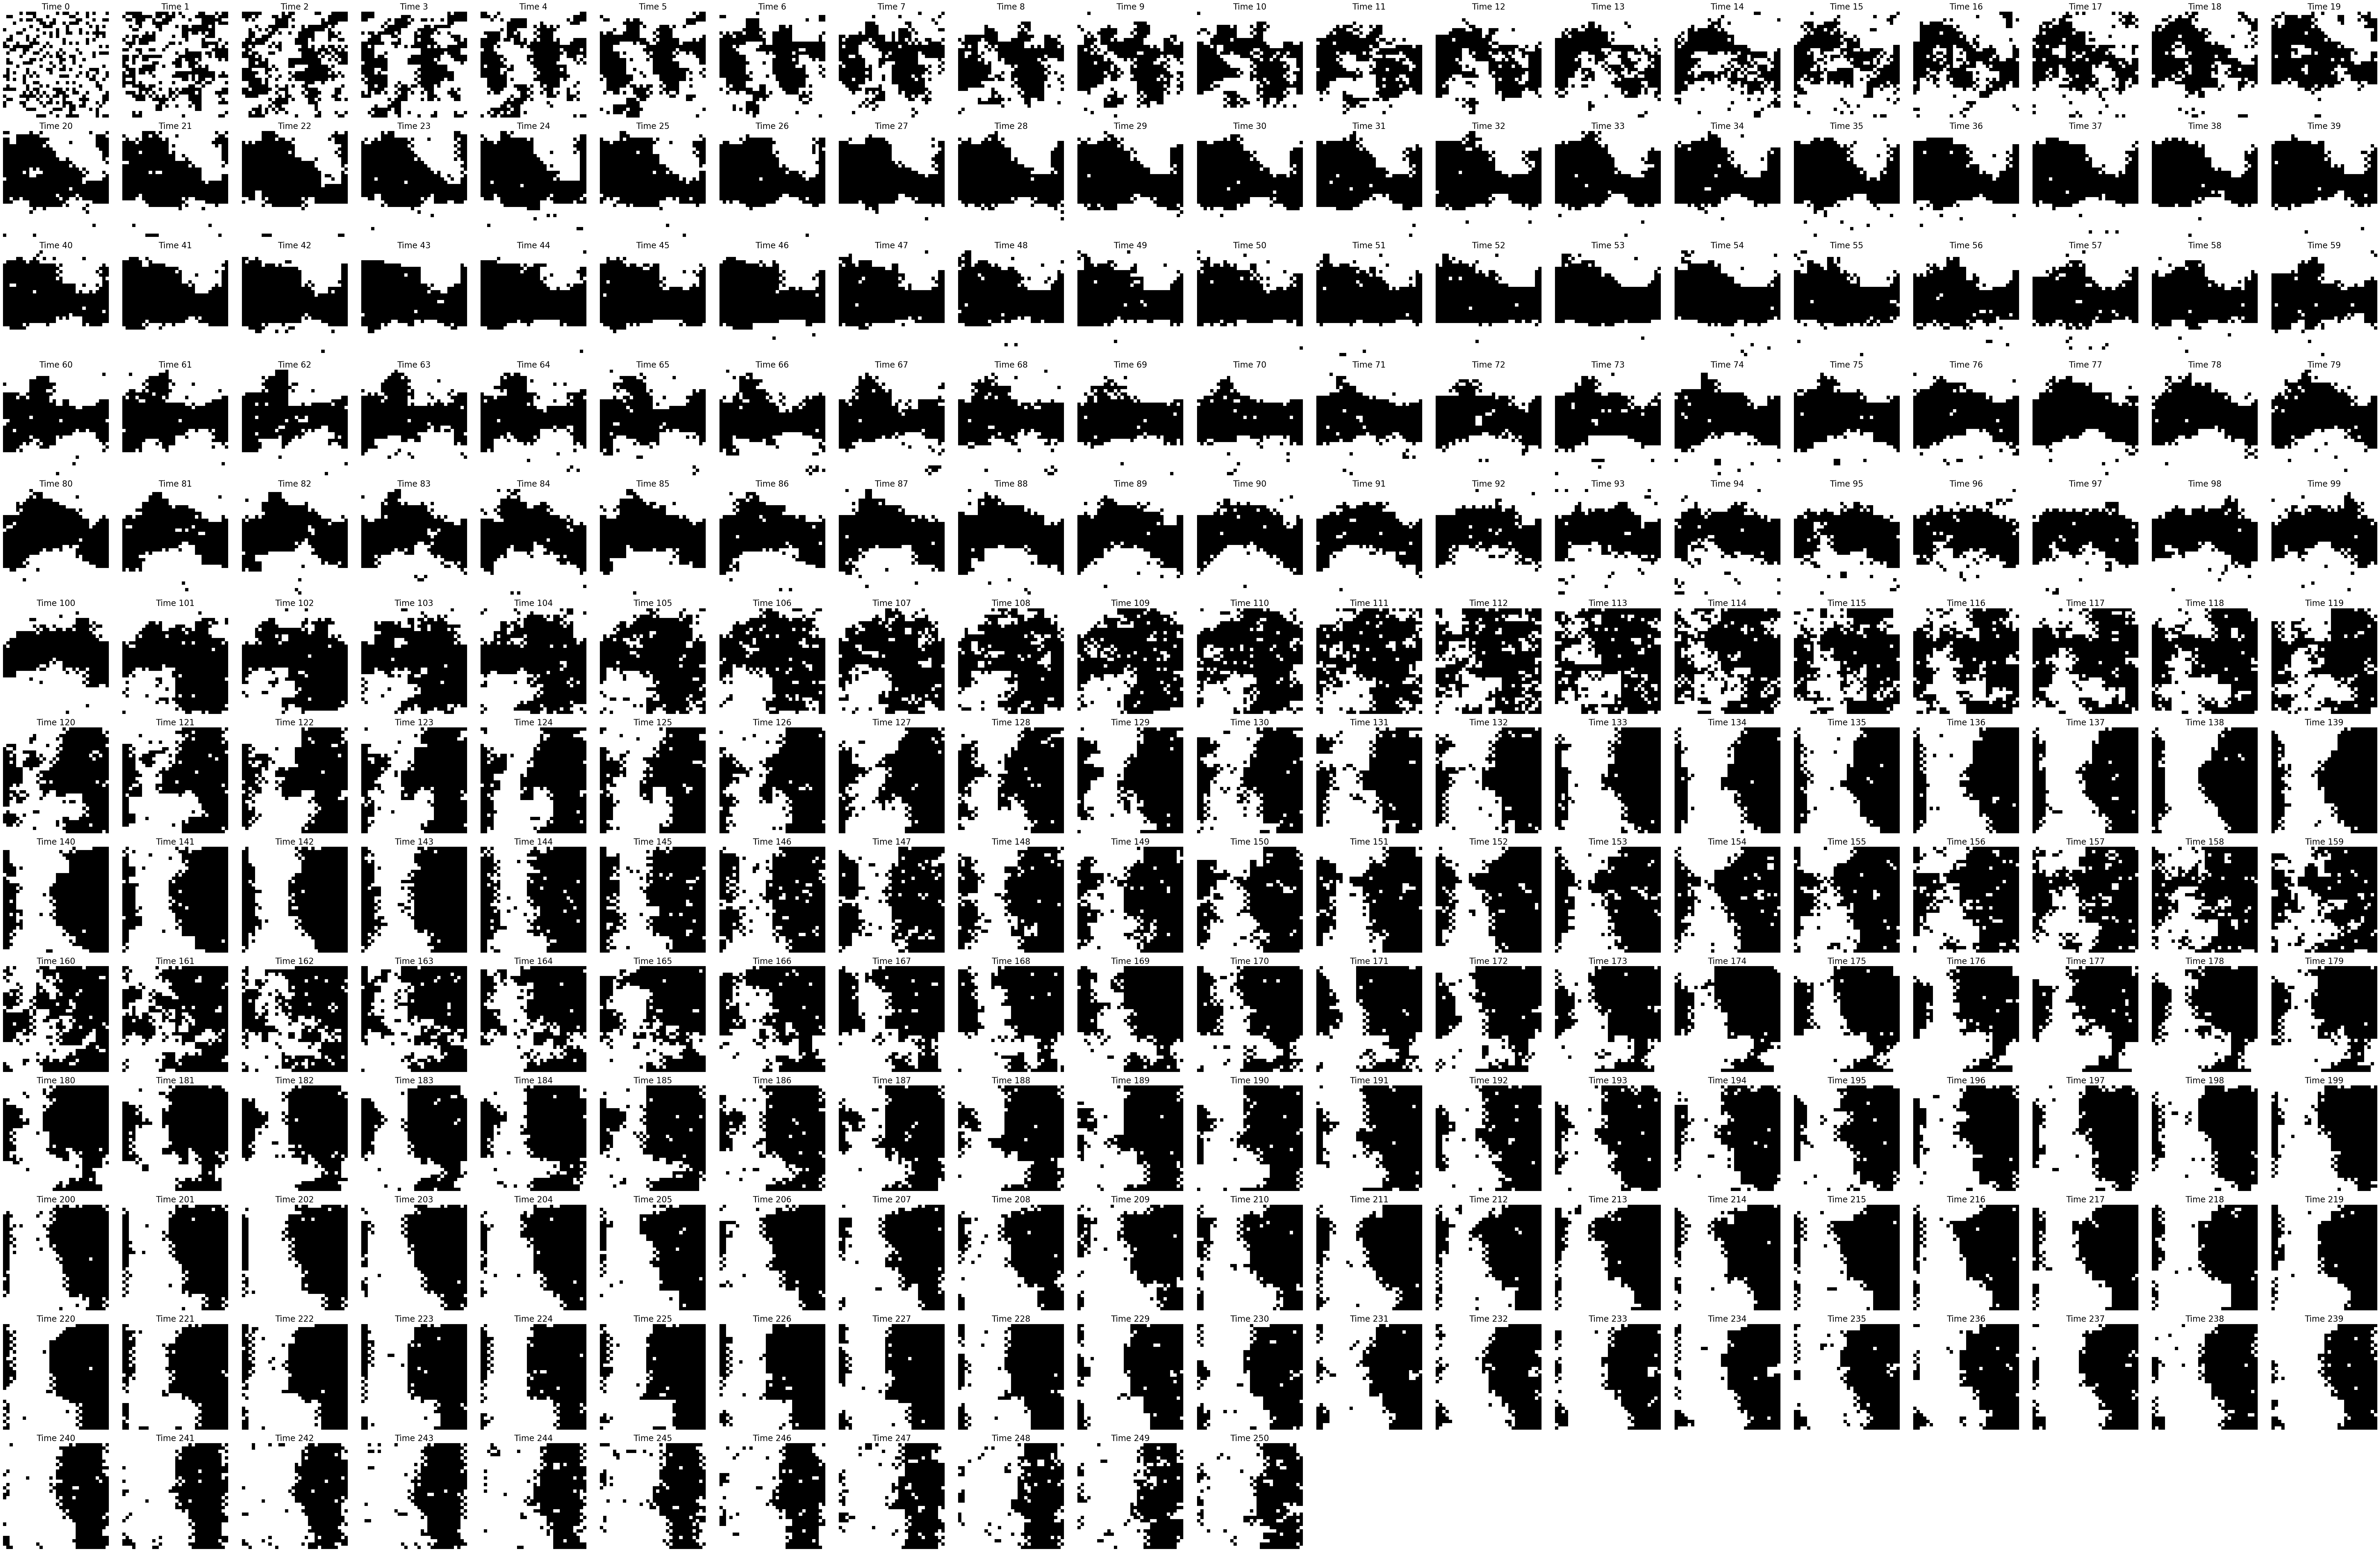

In [83]:
plot_array_list(full_grids_with_krach, max_cols=20)

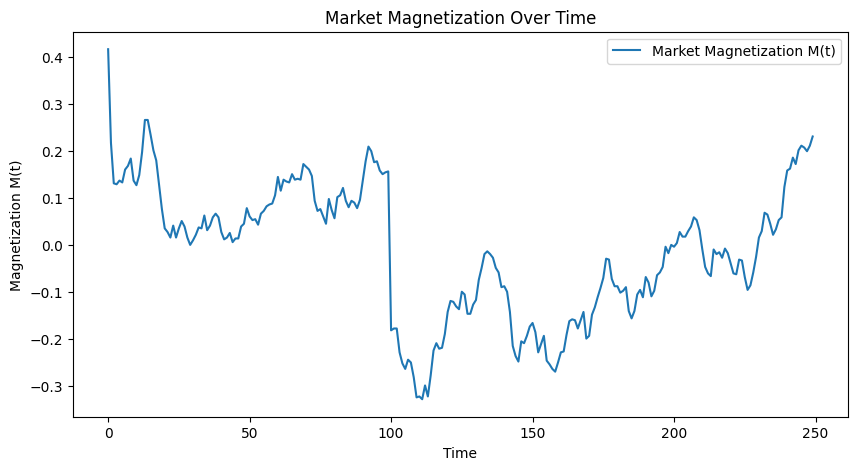

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(magnetisation, label="Market Magnetization M(t)")
plt.xlabel("Time")
plt.ylabel("Magnetization M(t)")
plt.title("Market Magnetization Over Time")
plt.legend()
plt.show()

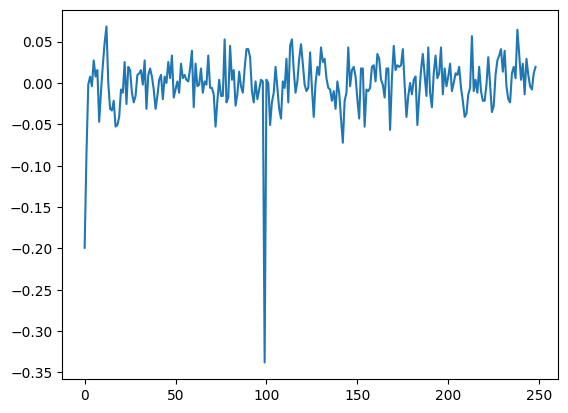

In [85]:
market_returns = np.diff(magnetisation)
plt.plot(market_returns)

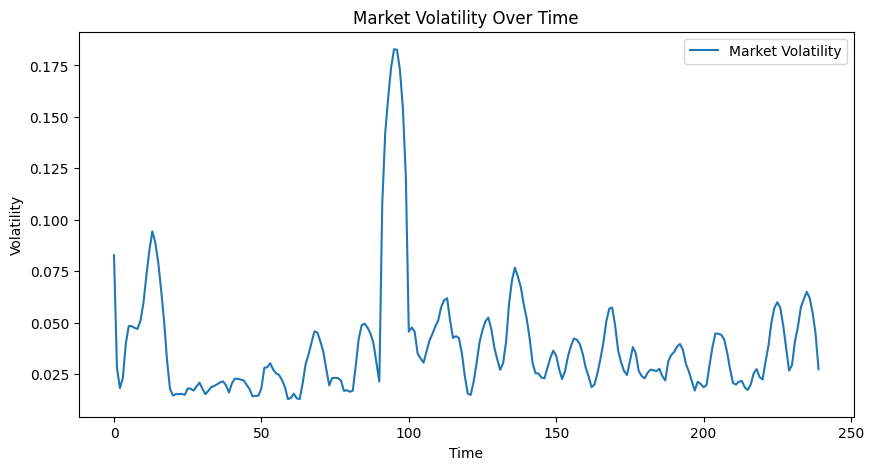

In [86]:
window_size = 10  # Fenêtre pour la volatilité
volatility_with_crash = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]

plt.figure(figsize=(10, 5))
plt.plot(volatility_with_crash, label="Market Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()

# II. Without market crash

In [87]:
#sans krach

#SEED = 42
#np.random.seed(SEED)
#random.seed(SEED)

#init system
spin_system = SpinSystem(
    grid_height=32,
    grid_width=32,
    init_up=0.3
)

full_grids_without_krach = []
full_grids_without_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(total_updates):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    magnetisation[ii % MAX_FILE_SIZE] = mag
    full_grids_without_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

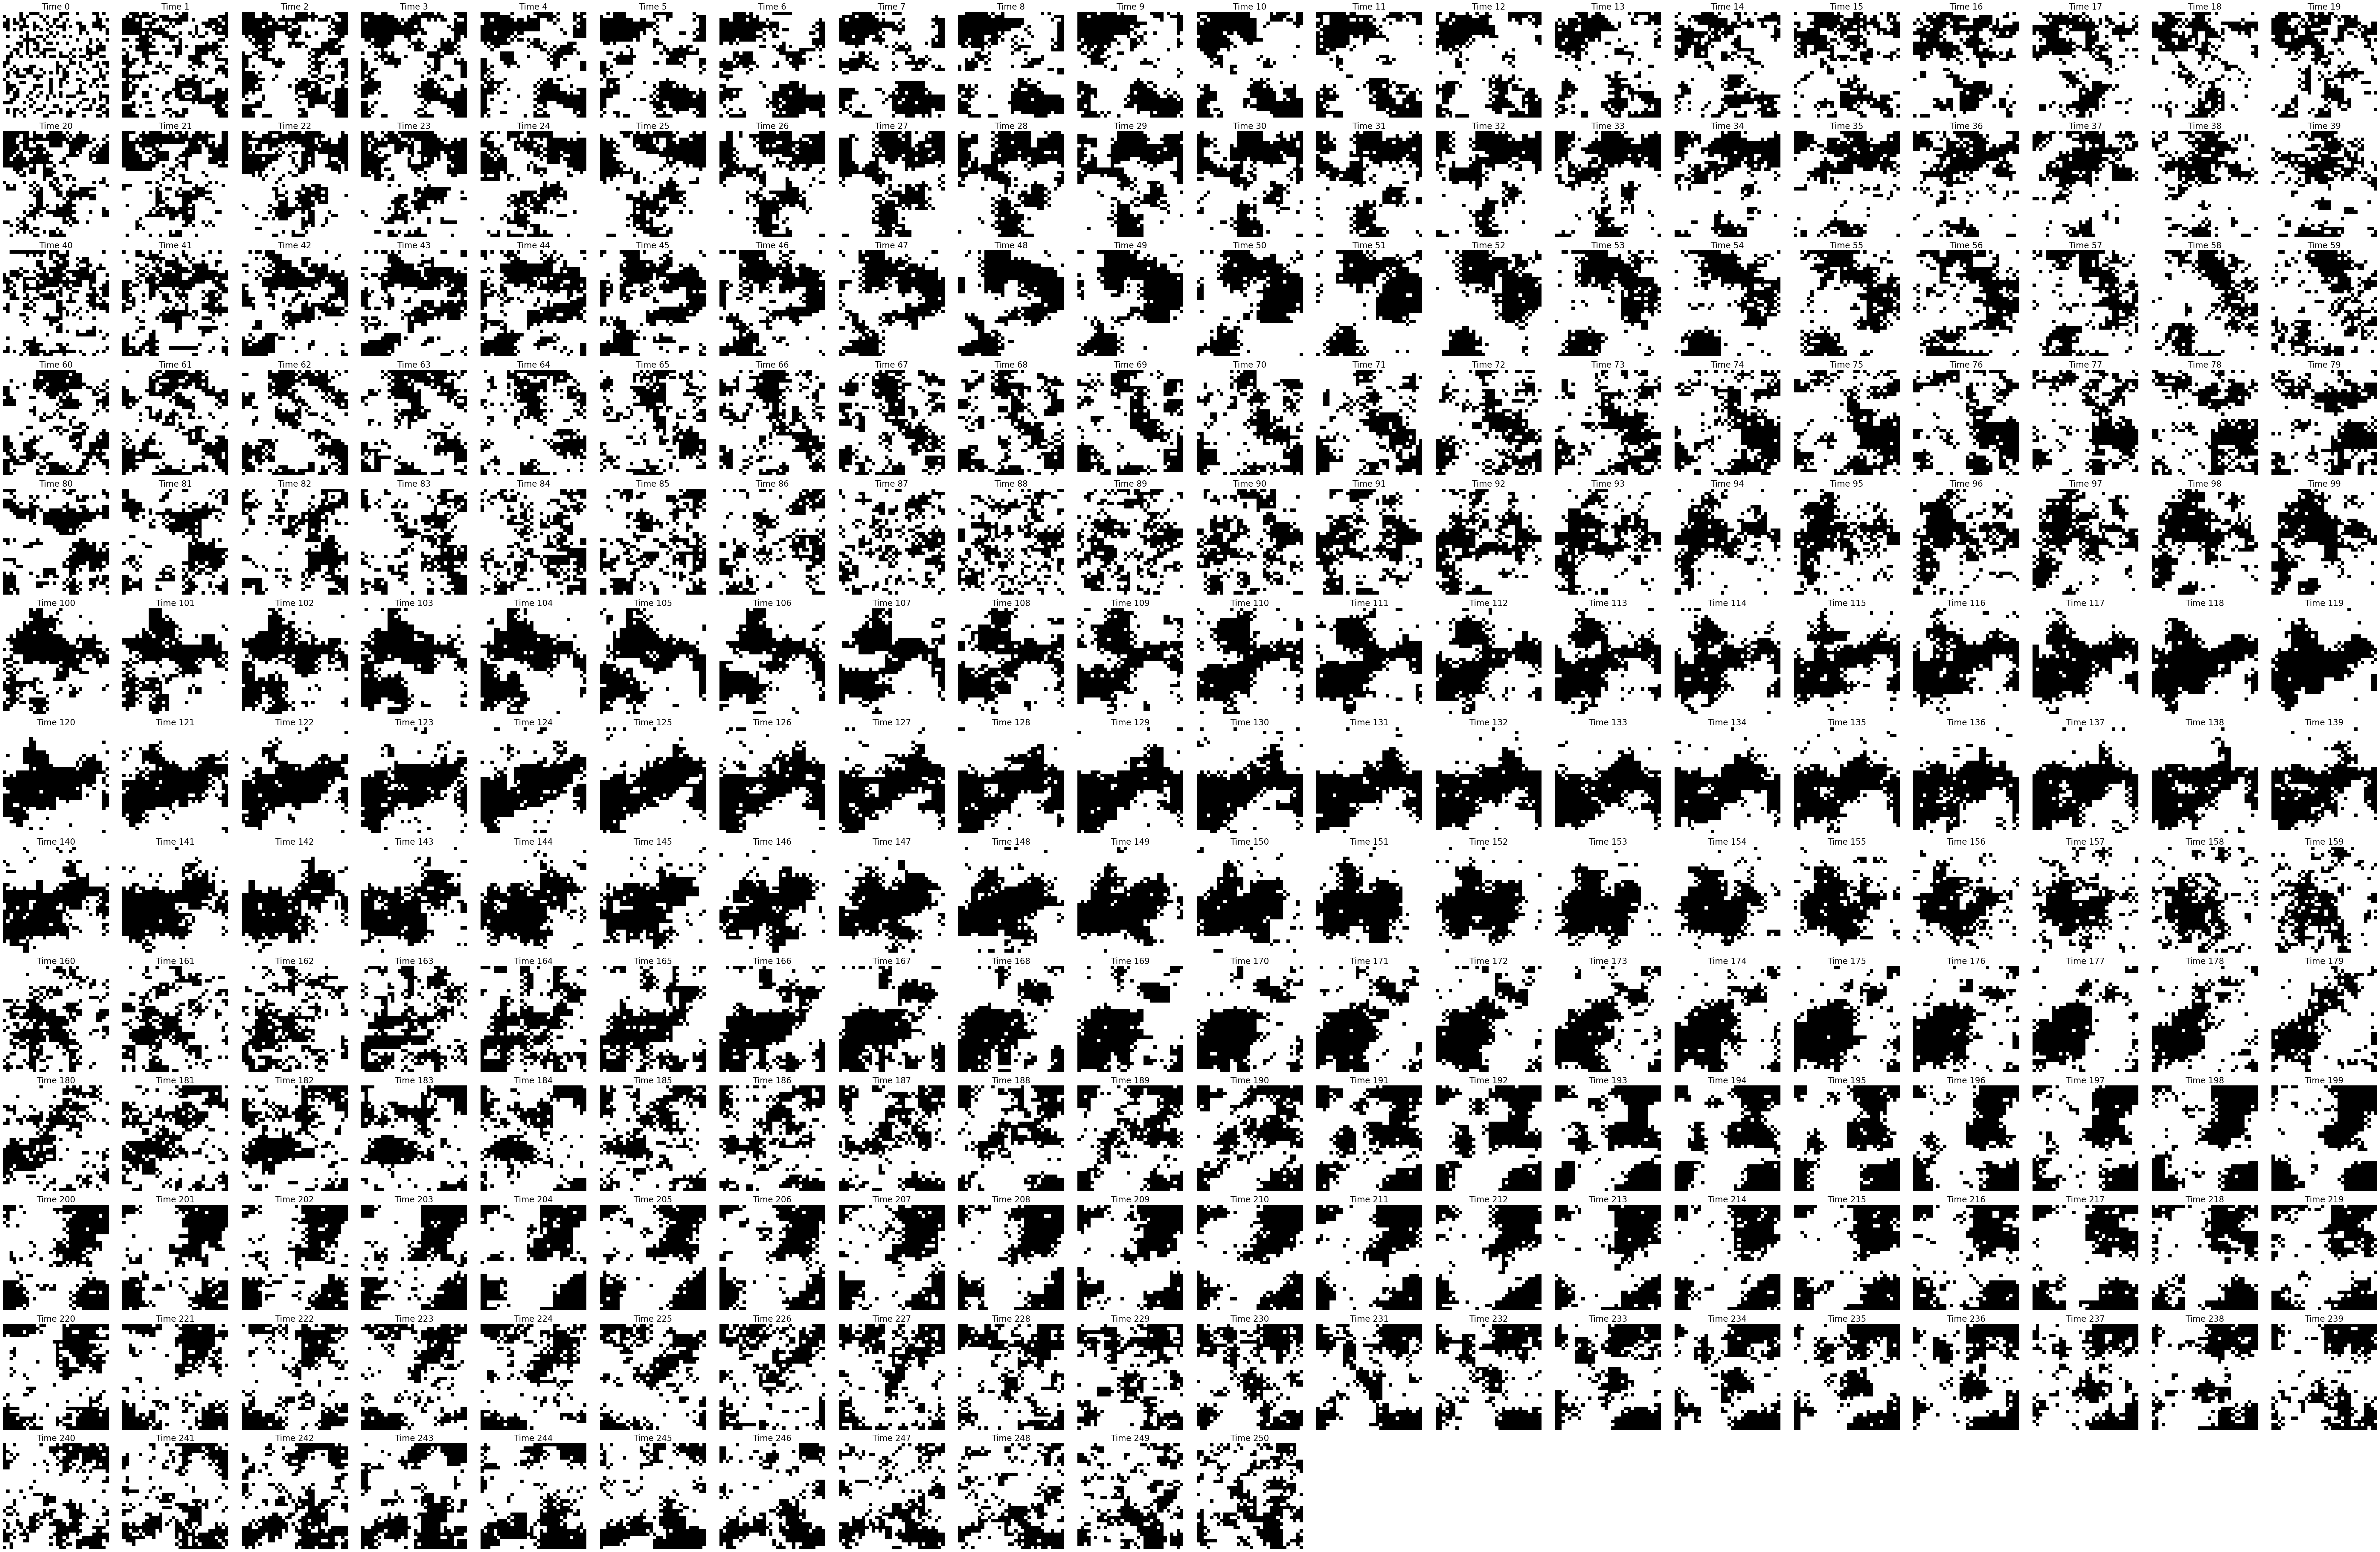

In [88]:
plot_array_list(full_grids_without_krach, max_cols=20)

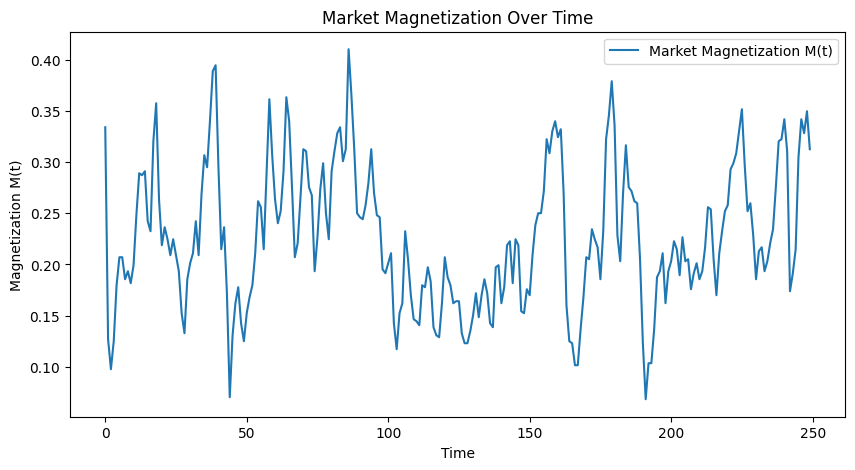

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(magnetisation, label="Market Magnetization M(t)")
plt.xlabel("Time")
plt.ylabel("Magnetization M(t)")
plt.title("Market Magnetization Over Time")
plt.legend()
plt.show()

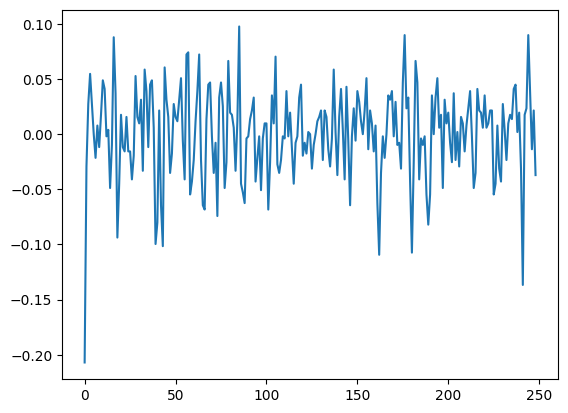

In [90]:
market_returns = np.diff(magnetisation)
plt.plot(market_returns)

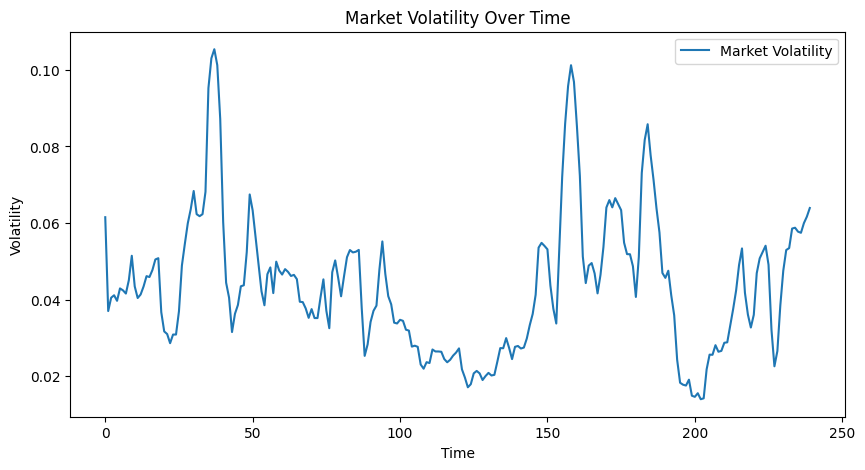

In [91]:
window_size = 10  # Fenêtre pour la volatilité
volatility_without_crash = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]

plt.figure(figsize=(10, 5))
plt.plot(volatility_without_crash, label="Market Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()

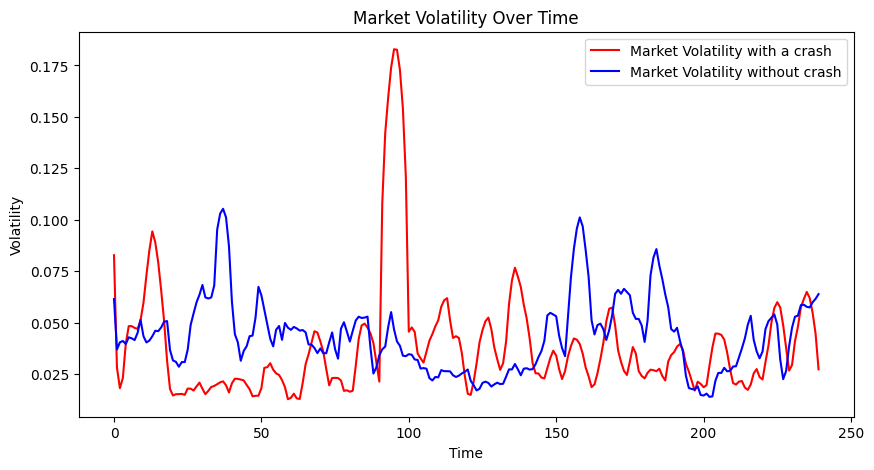

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(volatility_with_crash, color = "red", label="Market Volatility with a crash")
plt.plot(volatility_without_crash, color = "blue", label="Market Volatility without crash")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()

In [93]:
def simul_market_crash(fraction=1): 
    """ Function that simulates a market crash at time T=100 """   
    #Init Parameters 
    grid_height   = int(config["grid_height"])
    grid_width    = int(config["grid_width"])
    alpha         = float(config["alpha"])
    j             = float(config["j"])
    total_updates = int(config["total_updates"])
    init_up       = float(config["init_up"])
    T             = float(config["T"])
    beta          = 1 / T
    reduced_alpha              = -2.0 * beta * alpha
    reduced_neighbour_coupling = -2.0 * beta * j

    magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
    magnetisation[:] = nan
    
    # Environment
    spin_system = SpinSystem(
        grid_height=32,
        grid_width=32,
        init_up=0.3
    )

    full_grids_with_krach = []
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

    for ii in range(100):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        magnetisation[ii % MAX_FILE_SIZE] = mag
        full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

    #choc local
    spin_system.induce_local_crash(fraction=fraction, region="bottom_right")
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[100 % MAX_FILE_SIZE] = mag

    # Maintenant on poursuit la simulation pour voir la propagation
    for ii in range(101, total_updates):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
        magnetisation[ii % MAX_FILE_SIZE] = mag
        
    market_returns = np.diff(magnetisation)
    window_size = 10  # Fenêtre pour la volatilité
    volatility_with_crash = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]
    return full_grids_with_krach, magnetisation, market_returns, volatility_with_crash

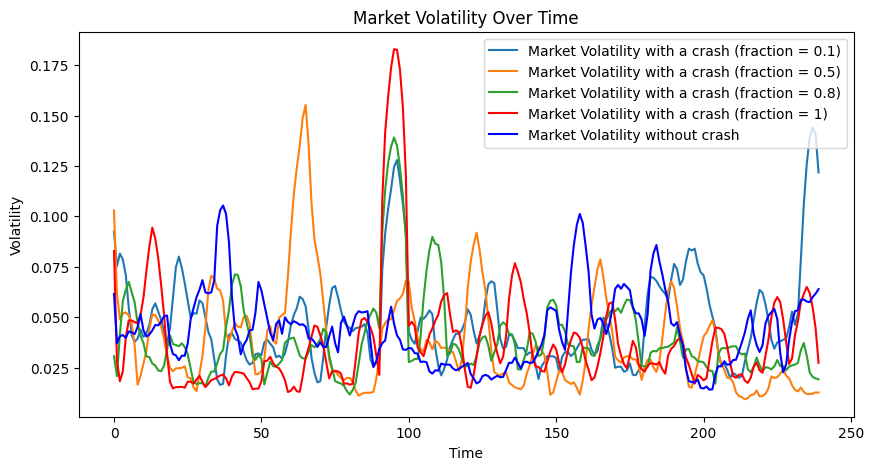

In [94]:
plt.figure(figsize=(10, 5))
for frac in [0.1, 0.5, 0.8]:
    full_grids_with_krach_frac, magnetisation_frac, market_returns_frac, volatility_with_crash_frac = simul_market_crash(fraction=frac)
    plt.plot(volatility_with_crash_frac, label=f"Market Volatility with a crash (fraction = {frac})")

plt.plot(volatility_with_crash, color = "red", label="Market Volatility with a crash (fraction = 1)")
plt.plot(volatility_without_crash, color = "blue", label="Market Volatility without crash")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()